<a href="https://colab.research.google.com/github/SreeVarshiniPettugadi/Task-6/blob/main/Task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

sns.set(style='whitegrid')

In [3]:
#Load Dataset
df = pd.read_csv("Iris.csv")

# Drop 'Id' column
df.drop('Id', axis=1, inplace=True)

# Encode the target column 'Species'
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

# Features and Target
X = df.drop('Species', axis=1)
y = df['Species']

In [4]:
#Normalize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [6]:
#Evaluate KNN for Multiple K Values
accuracies = []

for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K = {k} → Accuracy: {acc*100:.2f}")

K = 1 → Accuracy: 96.67
K = 2 → Accuracy: 100.00
K = 3 → Accuracy: 100.00
K = 4 → Accuracy: 100.00
K = 5 → Accuracy: 100.00
K = 6 → Accuracy: 100.00
K = 7 → Accuracy: 100.00
K = 8 → Accuracy: 100.00
K = 9 → Accuracy: 100.00
K = 10 → Accuracy: 100.00


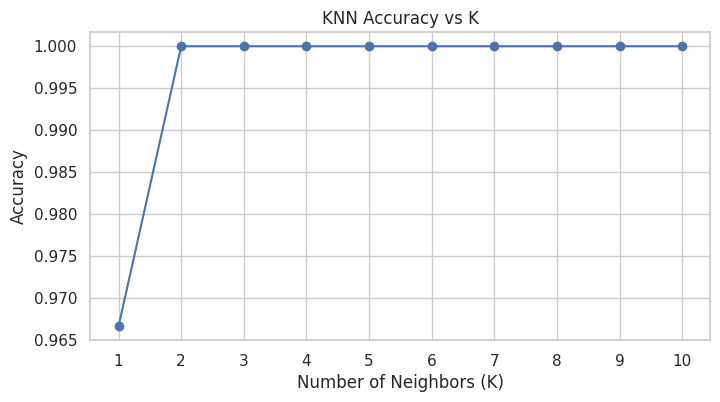

In [7]:
#Plot Accuracy vs K
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), accuracies, marker='o')
plt.title("KNN Accuracy vs K")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [8]:
#Final Model Evaluation (K=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
